### Multiverse Computing Assessment

**What is Systemic Crisis?**

Systemic crisis is a domino effect with which financial instability spreads between institutions and markets until it affects the whole economy. 

A systemic crisis emerges when problems in one or more banks are serious enough to have a significant adverse impact on the real economy. This impact is most often felt through the payment system, reductions in credit flows, or the destruction of asset values. A systemic crisis often is characterized by runs of creditors, including depositors, from both solvent and insolvent banks, thus threatening the stability of the entire banking system.

In [233]:
import io
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import xgboost
from xgboost import XGBRegressor


The focus of this analysis is to understand the interconnectedness of systemic crisis to macroeconomic factors and how these influences may lead to financial crisis.

Systemic crisis is the nationwide banking crisis which its impact spreads to the whole banking sector. There are two conditions to be met: 1) significant signs of financial distress are in a majority part of the banking system 2) significant banking policy intervention measures are implemented by the appropriate financial authorities in response to significant losses amongst the individual components of the banking system.

Systemic risk represents the risk connected to the complete failure of a business, a sector, an industry, a financial institution, or the overall economy. It can also be used to describe small, specific problems, such as the security flaws for a bank account or website user information.

***An example of systemic risk was the collapse of Lehman Brothers Holdings Inc. in 2008. After the global financial services firm filed for bankruptcy, shockwaves were felt throughout the entire financial system and the economy. Because Lehman Brothers was a large company and deeply ingrained within the economy, its collapse resulted in a domino effect that generated a major risk to the global financial system. This further was a contributor in the Great Recession of 2008, a global financial crisis***

This example tells us that systemic risks may lead to financial crisis which  may be limited to banks or spread throughout a single economy, the economy of a region, or economies worldwide. 

Therefore, it is important to understand how macroeconomic factors namely, GDP, exchange rate, Unemployment rate can affect or be affected by such systemic crisis. 


**DATA**

The data used here covers dates for systemic Crisis, Currency Crisis, Banking Crisis for all the countries from the years 1800-2016 which was collected by Carmen Reinhart (with her coauthors Ken Rogoff, Christoph Trebesch, and Vincent Reinhart) 

For the purpose of this analysis, we will focus on the 19 European Countries of Austria, Belgium, Denmark, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Netherlands, Norway, Poland, Portugal, Spain, Sweden, Switzerland, and The United Kingdom.

As mentioned earlier, systemic crisis affect macroeconomic factors. So for our study, we have considered variables concerning the GDP, exchange rate, and unemployment rate (collected from the OECD Public Finance Dataset)

In [234]:
df = pd.read_excel(r'/Users/yogdagharat/Desktop/Main.xlsx')

df1 = pd.read_excel(r'/Users/yogdagharat/Desktop/OCED_Euro.xlsx')


In [235]:
df1 = df1.rename(columns = {'year':'Year',
                          'country':'Country',
                          'gap':'Output_gap',
                          'pgdp':'GDP_price_deflator',
                          'unr':'Unemployment_rate'})

In [236]:
df = df.rename(columns = {'CC3':'Country',
                          'SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors':'sovereign_debt1', 
                          'SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors': 'sovereign_debt2',
                          'GDP_Weighted_default': 'gdp_weight',
                          'Inflation, Annual percentages of average consumer prices':'inflation_cpi_annual',
                          'BankingCrisis':'banking_crisis',
                          'Systemic Crisis':'systemic_crisis',
                          'Currency Crises':'currency_crises',
                          'Inflation Crises':'inflation_crises'})

In [237]:
main = pd.merge(df, df1, on = ['Country','Year'])
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 681
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               682 non-null    object 
 1   Year                  682 non-null    float64
 2   systemic_crisis       671 non-null    float64
 3   exch_usd              682 non-null    float64
 4   sovereign_debt1       574 non-null    float64
 5   sovereign_debt2       574 non-null    float64
 6   gdp_weight            574 non-null    float64
 7   inflation_cpi_annual  682 non-null    float64
 8   Independence          682 non-null    float64
 9   currency_crises       682 non-null    float64
 10  inflation_crises      682 non-null    float64
 11  Output_gap            542 non-null    float64
 12  Unemployment_rate     636 non-null    float64
 13  GDP_price_deflator    640 non-null    float64
dtypes: float64(13), object(1)
memory usage: 79.9+ KB


**DATASET DESCRIPTION**

*systemic_crisis* : "0" means that no systemic crisis occurred in the year and "1" means that a systemic crisis occurred in the year.


*exch_usd* : exchange rate - the value of one’s nation’s currency versus the currency of another nation 

Sovereign debt: issued by the national government in a foreign currency to finance the issuing country's growth and development. If categorized as external debt, it is debt owed to lenders in foreign areas.

*sovereign_debt1* : "0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt default occurred in the year.
(external debt, does not include debts to United Kingdom and post-1975 defaults on Official External Creditors)	

*sovereign_debt2*  : "0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt default occurred in the year.
(does not include debts to United Kingdom but includes post-1975 defaults on Official External Creditors)	

*gdp_weight* : The total debt in default vis-a-vis the GDP

*inflation_cpi_annual* : The annual CPI (Consumer Price Index) Inflation rate

*Independence* : "0" means "no independence" and "1" means "independence".

*currency_crises* : "0" means that no currency crisis occurred in the year and "1" means that a currency crisis occurred in the year.

*inflation_crises* : "0" means that no inflation crisis occurred in the year and "1" means that an inflation crisis occurred in the year.

*Output_gap* :  the difference between actual GDP and potential GDP, in an attempt to identify the current economic position over the business cycle.

*Unemployment_rate* : Unemployment Rate for the years 1980-2016

*GDP_price_deflator* : Changes in prices for goods in an economy. Use to compare the economy levels from one year to another


**INITIAL ANALYSIS**

After selecting the variables based on the domain knowledge, we will proceed to the initial analysis. 
This includes changing the datatypes for the requires variables, handling missing values and building visualizations to understand our variables and their relationships.

In [238]:
main['Year'] = pd.to_datetime(main['Year'], format="%Y")

In [239]:
main['Independence'] = main['Independence'].astype('object')

In [240]:
main.isnull().sum()

Country                   0
Year                      0
systemic_crisis          11
exch_usd                  0
sovereign_debt1         108
sovereign_debt2         108
gdp_weight              108
inflation_cpi_annual      0
Independence              0
currency_crises           0
inflation_crises          0
Output_gap              140
Unemployment_rate        46
GDP_price_deflator       42
dtype: int64

In [241]:
#Checking Percentage of Missing Values 

m1 = main.copy()  
mis_percent = 100 * m1.isnull().sum() / len(m1)
mis_percent

Country                  0.000000
Year                     0.000000
systemic_crisis          1.612903
exch_usd                 0.000000
sovereign_debt1         15.835777
sovereign_debt2         15.835777
gdp_weight              15.835777
inflation_cpi_annual     0.000000
Independence             0.000000
currency_crises          0.000000
inflation_crises         0.000000
Output_gap              20.527859
Unemployment_rate        6.744868
GDP_price_deflator       6.158358
dtype: float64

There are significant missing values in our dataset. There are multiple ways to handle missing values. 

For our analysis, **KNNImputer** is used to handle these values.

This imputer utilizes the k-Nearest Neighbors method to replace the missing values in the datasets with the mean value from the parameter ‘n_neighbors’ nearest neighbors found in the training set. By default, it uses a Euclidean distance metric to impute the missing values.

In [242]:
#KNN Imputer

imputer = KNNImputer(n_neighbors=1)

col = ['systemic_crisis','sovereign_debt1','sovereign_debt2', 'gdp_weight','Output_gap','Unemployment_rate','GDP_price_deflator']

imputer.fit(m1[col])

imputed = imputer.transform(m1[col])

In [243]:
m1.loc[:, col] = imputed
m1.isnull().sum()

Country                 0
Year                    0
systemic_crisis         0
exch_usd                0
sovereign_debt1         0
sovereign_debt2         0
gdp_weight              0
inflation_cpi_annual    0
Independence            0
currency_crises         0
inflation_crises        0
Output_gap              0
Unemployment_rate       0
GDP_price_deflator      0
dtype: int64

**DATA VISUALIZATIONS**

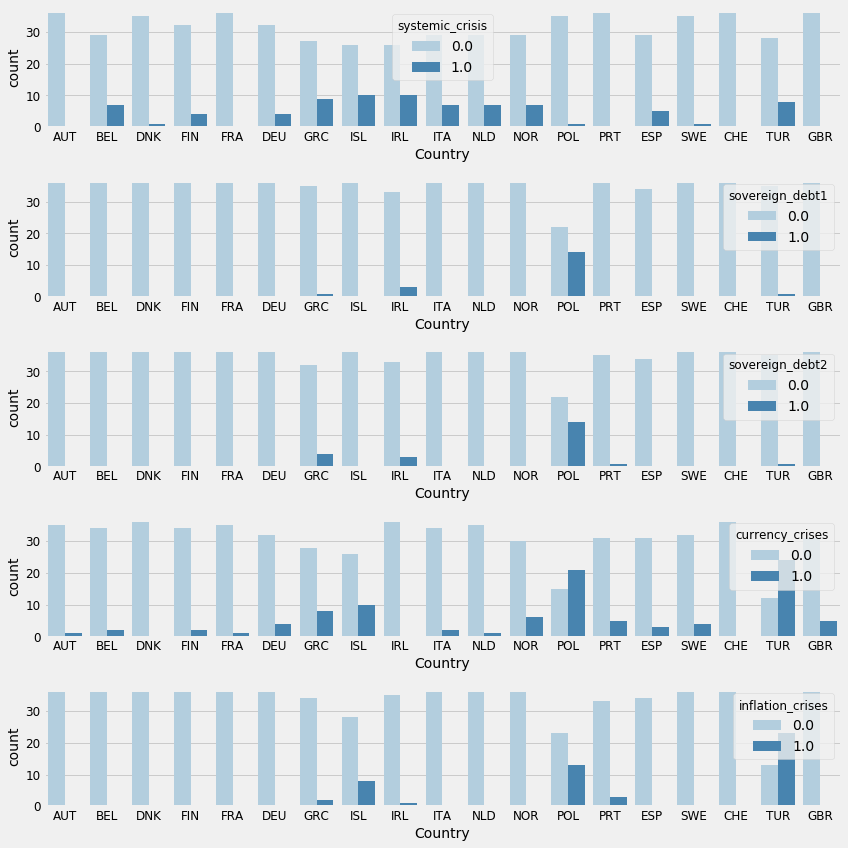

In [244]:
cols = ['systemic_crisis', 'sovereign_debt1', 'sovereign_debt2', 'currency_crises', 'inflation_crises' ]

fig, axes = plt.subplots(ncols=1, nrows=5, figsize=(12,12))
axes = axes.flatten()

for i, ax in zip(cols, axes):
  sns.countplot(x = 'Country', ax = ax, data = m1, hue = i, palette = 'Blues')
plt.tight_layout()
display()

1. **Systemic crisis** and **Currency crisis** were the two major forms of crises affecting the European nations between the years 1981 - 2016, withe systemic crisis being the prominent one. 


2. Only five countries, Austria, France, Portugal, Switzerland and The United Kingdom did not experience any systemic crisis. However, the 2008 Recession did have an impact on the economy of these countries. The reason for this discrepancy would be that the 2008 crisis is considered as an economic crisis (systemic risk as well as systematic risks are contributors) 

 
3. Another interesting observation is that countries that have experienced Systemic Crisis, have also experienced Currency Crisis. This explains how systemic crisis (which has system risk indicators) contributes or affects factors that can eventually lead to currency crisis, banking crisis or may lead to financial crisis.


4. The countries of Poland, Greece and Iceland have sovereign debts which leads to the inference that countries with defaults can lead to systemic risks, which ultimately can cause banking crisis.

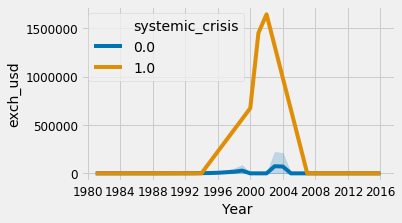

In [245]:
plt.figure(figsize = (5,3))
sns.lineplot(x = 'Year', y = 'exch_usd', hue = 'systemic_crisis', data = m1, palette = 'colorblind')
plt.xlabel('Year')
plt.ylabel('exch_usd')
display()

The **exchange rate** fluctuates drastically during the years that have experienced systemic_crisis. If exchange rate fluctuates widely, it could cause economic instability that could eventually lead to unrest in the economy. 

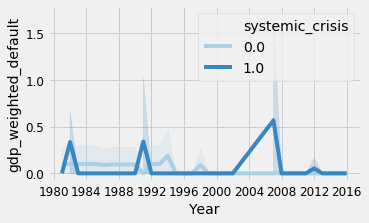

In [246]:
plt.figure(figsize = (5,3))
sns.lineplot(x = 'Year', y = 'gdp_weight', hue = 'systemic_crisis', data = m1, palette = 'Blues')
plt.xlabel('Year')
plt.ylabel('gdp_weighted_default')
display()

The debt-to-GDP default value is the the country's public debt to its GDP. If this value is higher, it is less likely that the country will pay its debt back and higher its risk of default, which could eventually lead to financial panic. 

From the graph, it is evident that the **debt-to-GDP** ratio was higher during the systemic crisis years. 

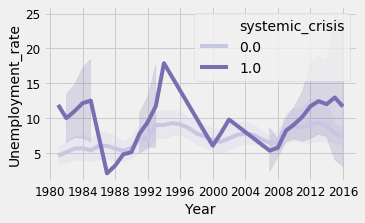

In [247]:
plt.figure(figsize = (5,3))
sns.lineplot(x = 'Year', y = 'Unemployment_rate', hue = 'systemic_crisis', data = m1, palette = 'Purples')
plt.xlabel('Year')
plt.ylabel('Unemployment_rate')
display()

**Unemployment_rate** is a marcoeconomic factor that needs to be assessed when a country is experiencing any kind of financial crisis. Countries experiencing systemic crisis would have higher unemployment rate as the economy is in poor shape and jobs would be scarce.

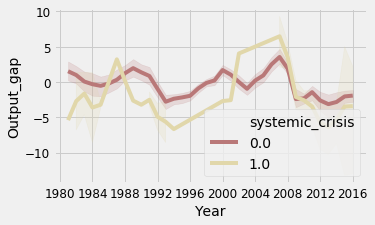

In [248]:
plt.figure(figsize = (5,3))
sns.lineplot(x = 'Year', y = 'Output_gap', hue = 'systemic_crisis', data = m1, palette = 'pink')
plt.xlabel('Year')
plt.ylabel('Output_gap')
display()

An **output gap** is an unfavorable indicator of an economy's efficiency, regardless of whether it's positive or negative. The graph shows that throughout the years, irrespective of systemic crisis, all the countries have experienced an output gap.

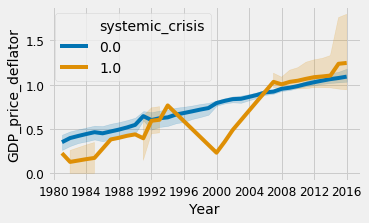

In [249]:
plt.figure(figsize = (5,3))
sns.lineplot(x = 'Year', y = 'GDP_price_deflator', hue = 'systemic_crisis', data = m1, palette = 'colorblind')
plt.xlabel('Year')
plt.ylabel('GDP_price_deflator')
display()

The **GDP price deflator** helps economists compare the levels of real economic activity from one year 
to another. GDP is one of the marcoeconomic factors that can have an effect on the financial crisis. 
From the graph, we can infer that the deflator_price decreased during the systemic crisis years. This again supports our theory that macroeconomic factors are influence by systemic crisis. 

**CORRELATION**


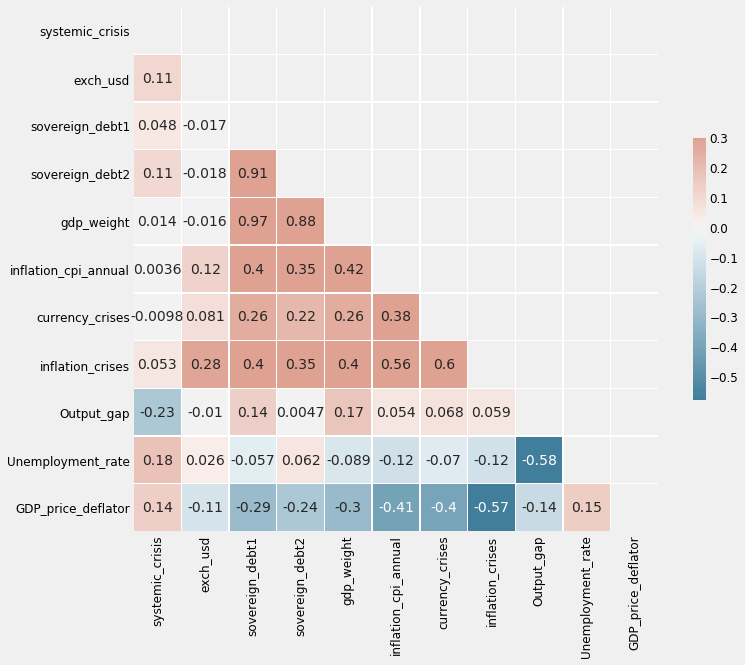

In [250]:
# Compute the correlation matrix
corr = m1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Inferences from the Correlation Heatmap

1. **Systemic crisis** is **positively** correlated to the variables **unemployment rate**, **GDP_price_deflator** and, **exch_usd**. This supports our understanding that systemic crisis have an affect on economic factors pertaining to a particular country. If the crisis is not handled, it can lead to financial crisis on an economic level.
    
    
2. It can be inferred that the GDP of a country decreases if the country is in systemic crisis from the **negative correlation** observed between the variables **systemic_crisis** and **Output_gap**.
    
    
3.The variables **Gdp_weight** and **sovereign_debt** have a **positive** correlation.
    


In [251]:
m2 = m1.copy()

**FEATURE SELECTION**

 If we were to consider forecasting systemic_crisis, we need to find which variables influence it the most. Additionally, we also further need to strengthen the correlation findings. This can be done by performing feature importance.

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. The scores are useful and can be used in a range of situations in a predictive modeling problem, such as:

- Better understanding the data.
- Better understanding a model.
- Reducing the number of input features.

We have used **RandomForestRegressor**, **DecisionTreeRegressor**, and **XGBoostRegressor** to understand feature importance with related to our outcome variable 'systemic_crisis'

In [252]:
feature_list = ['exch_usd', 'sovereign_debt1', 'sovereign_debt2', 'gdp_weight',
                'inflation_cpi_annual', 'currency_crises', 'inflation_crises', 'Output_gap',
       'Unemployment_rate', 'GDP_price_deflator']

x = m2[feature_list]
y = m1.systemic_crisis

***RandomForestRegressor***


In [253]:
model_rf = RandomForestRegressor()
model_rf.fit(x, y)

importance_rf = model_rf.feature_importances_

In [254]:
feature_importance = {'Feature':feature_list,
                      'Coef_Score': importance_rf}

feature_importance = pd.DataFrame(feature_importance)
feature_importance = feature_importance.sort_values(by='Coef_Score',ascending=False)
feature_importance

,Feature,Coef_Score
9,GDP_price_deflator,0.306829
7,Output_gap,0.279295
0,exch_usd,0.156165
8,Unemployment_rate,0.130052
4,inflation_cpi_annual,0.117968
5,currency_crises,0.003722
2,sovereign_debt2,0.003205
1,sovereign_debt1,0.001361
3,gdp_weight,0.001060
6,inflation_crises,0.000342


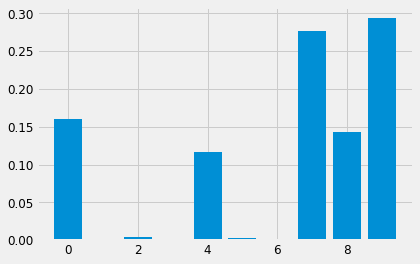

In [255]:
pyplot.bar([x for x in range(len(importance_rf))], importance1)
pyplot.show()

Four most important features: **GDP_price_deflator**, **Output_gap**, **exch_usd**, **Unemployment_rate**

***DecisionTreeRegressor***

In [256]:
model_dec = DecisionTreeRegressor()

model_dec.fit(x, y)

importance_dec = model.feature_importances_

In [257]:
feature_importance = {'Feature':feature_list,
                      'Coef_Score': importance_dec}

feature_importance = pd.DataFrame(feature_importance)
feature_importance = feature_importance.sort_values(by='Coef_Score',ascending=False)
feature_importance

,Feature,Coef_Score
7,Output_gap,0.235205
9,GDP_price_deflator,0.206905
0,exch_usd,0.157783
8,Unemployment_rate,0.155266
1,sovereign_debt1,0.140029
4,inflation_cpi_annual,0.095523
5,currency_crises,0.006760
2,sovereign_debt2,0.002027
3,gdp_weight,0.000502
6,inflation_crises,0.000000


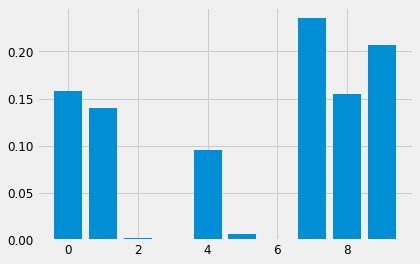

In [258]:
pyplot.bar([x for x in range(len(importance_dec))], importance)
pyplot.show()

Four most important features: **currency_crisis**, **exch_usd**, **GDP_price_deflator**, **Output_gap**

***XGBRegressor***

In [259]:
model = XGBRegressor()

model.fit(x, y)

importance_xg = model.feature_importances_

In [260]:
feature_importance = {'Feature':feature_list,
                      'Coef_Score': importance_xg}

feature_importance = pd.DataFrame(feature_importance)
feature_importance = feature_importance.sort_values(by='Coef_Score',ascending=False)
feature_importance

,Feature,Coef_Score
7,Output_gap,0.235205
9,GDP_price_deflator,0.206905
0,exch_usd,0.157783
8,Unemployment_rate,0.155266
1,sovereign_debt1,0.140029
4,inflation_cpi_annual,0.095523
5,currency_crises,0.006760
2,sovereign_debt2,0.002027
3,gdp_weight,0.000502
6,inflation_crises,0.000000


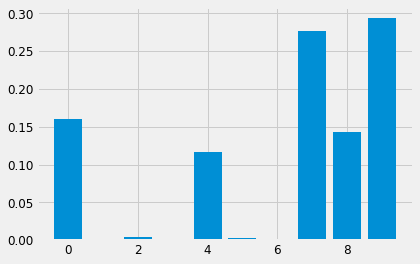

In [261]:
pyplot.bar([x for x in range(len(importance_xg))], importance1)
pyplot.show()

Four most important features: **Output_gap**, **GDP_price_deflator**, **exch_usd**, **Unemployment_rate**

The Feature importance analysis helps to understand how macroeconomic factors **Output_gap**, **GDP_price_deflator**, **exch_usd**, **Unemployment_rate** influence the target variable **systemic_crisis**.

Systemic crisis and risks contribute to financial crisis.  A financial crisis is often associated with a panic or a bank run during which investors sell off assets or withdraw money from savings accounts because they fear that the value of those assets will drop if they remain in a financial institution. It includes the bursting of a speculative financial bubble, a stock market crash, a sovereign default, or a currency crisis. 

Using this domain knowledge, it is safe to say that the variables **currency_crisis** and **sovereign_debt** can be used for forecasting systemic_crisis.

**MODEL SUGGESTIONS FOR FORECASTING SYSTEMIC CRISIS**

1. Vector Autoregression (VAR) is a forecasting algorithm that can be used when two or more time series influence each other. That is, the relationship between the time series involved is bi-directional. In this post, we will see the concepts, intuition behind VAR models and see a comprehensive and correct method to train and forecast VAR models in python using statsmodels.[2][3]

2. LSTM is an artificial recurrent neural network used in deep learning and can process entire sequences of data. Due to the model’s ability to learn long term sequences of observations, LSTM has become a trending approach to time series forecasting. Using LSTM, time series forecasting models can predict future values based on previous, sequential data. This provides greater accuracy for demand forecasters which results in better decision making for the business. [4]

3. The generalized autoregressive conditional heteroskedasticity (GARCH) describes an approach to estimate volatility in financial markets. The general process for a GARCH model involves three steps. The first is to estimate a best-fitting autoregressive model. The second is to compute autocorrelations of the error term. The third step is to test for significance. [5]

4. In statistics and econometrics, and in particular in time series analysis, an autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). [6] 



**FUTURE SCOPE**

To study banking and systemic crisis, it is important to understand the health, soundness, and vulnerabilities of a financial system to identify systemic risks. This is done using **Macroprudential Analysis** that looks at the health of the underlying financial institutions in the system and performs stress tests and scenario analysis to help determine the system's sensitivity to economic shocks. This analysis involves looking at key macroeconomic data such as GDP growth, inflation, interest rates, exchange rates, asset prices, etc.
It also looks at the interconnectedness of financial system participants, and at how risks can be transmitted through the system via these financial linkages.

**REFERENCES**

[1] Mr. Marc G Quintyn and Mr. David S. Hoelscher, 2003. "Managing Systemic Banking Crisis"

[2] Nikolaus Hautsch & Julia Schaumburg & Melanie Schienle, 2013. "Forecasting systemic impact in financial networks," SFB 649 Discussion Papers SFB649DP2013-008, Sonderforschungsbereich 649, Humboldt University, Berlin, Germany.

[3] Jon Danielsson, Kevin R. James, Marcela Valenzuela, Ilknur Zer, November 2011. "Model Risk of Systemic Risk Models" London School of Economics. 

[4] YM Tang ,Ka-Yin Chau ,Wenqiang Li, and, TW Wan, 2020 "Forecasting Economic Recession through Share Price in the Logistics Industry with Artificial Intelligence (AI)" Department of Industrial and Systems Engineering, The Hong Kong Polytechnic University, Hung Hom, Hong Kong, China.

[5] Young Shin Kima, Svetlozar T. Rachevb, Michele Leonardo Bianchic, Ivan Mitovd, Frank J. Fabozzie, 2010. "Time Series Analysis for Financial Market Meltdowns"

[6] Roy C.P. Chung, W.H. Ip and S.L. Chan, 2009. "An ARIMA-Intervention Analysis Model for the Financial Crisis", Department of Industrial and Systems Engineering, The Hong Kong Polytechnic University, Hung Hom, Kowloon, Hong Kong. 

[7] https://www.investopedia.com/